In [1]:
import os
import numpy as np
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
!tar -xvzf /content/review_polarity.tar.gz

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv014_15600.txt
txt_sentoken/neg/cv015_29356.txt
txt_sentoken/neg/cv016_4348.txt
txt_sentoken/neg/cv017_23487.txt
txt_sentoken/neg/cv018_21672.txt
txt_sentoken/neg/cv019_16117.txt
txt_sentoken/neg/cv020_9234.txt
txt_sentoken/neg/cv021_17313.txt
txt_sentoken/neg/cv022_14227.txt
txt_sentoken/neg/cv023_13847.txt
txt_sentoken/neg/cv024_7033.txt
txt_sentoken/neg/cv025_29825.txt
txt_sentoken/neg/cv026_29229.txt
txt_sentoken/neg/cv027_26270.txt
txt_sentoken/neg/cv028_26964.txt
txt_sentoken/neg/cv029_19943.txt
txt_sentoken/n

In [4]:
def load_data(path, label):
    reviews = []
    labels = []

    for filename in os.listdir(path):
        if filename.endswith(".txt"):
            with open(os.path.join(path, filename), 'r', encoding='utf-8') as file:
                reviews.append(file.read())
                labels.append(label)


    return np.array(reviews),np.array(labels)

pos_path = "/content/txt_sentoken/pos"
neg_path = "/content/txt_sentoken/neg"
pos,p_label = load_data(pos_path, 1)
neg,n_label = load_data(neg_path, 0)

X_train0, X_test0, y_train0, y_test0  = train_test_split(pos,p_label, test_size=0.1, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(neg,n_label, test_size=0.1, random_state=42)

X_train = np.concatenate((X_train0,X_train1))
X_test = np.concatenate((X_test0,X_test1))
y_train = np.concatenate((y_train0,y_train1))
y_test = np.concatenate((y_test0,y_test1))


In [5]:
X_train.shape, X_train1.shape,np.concatenate((X_train,X_train1)).shape

((1800,), (900,), (2700,))

# Preproccessing

In [26]:
# Initialize tokenizer and stopwords
tokenizer = ToktokTokenizer()
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
stemmer_snow = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
# punctuation and numers and other characters
special = r'[^a-zA-Z0-9\s]'

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(special, '', text)
    # Tokenization
    words = nltk.word_tokenize(text)
    # Stemming and Remove stopwords
    # words = [stemmer.stem(word) for word in words if word not in stop_words]
    # words = [stemmer_snow.stem(word) for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # best accuracy
    # Join words back into a single string
    text = ' '.join(words)
    return text

X_train = np.array([preprocess(text) for text in X_train])
X_test = np.array([preprocess(text) for text in X_test])

In [27]:
X_train[:2]

array(['garry shandling make long overdue starring film debut alien planet populated genetically created men looking take earth propagating specie shandling chosen mission given name harold anderson set banker seattle disastrous mating attempt figure best bet susan annette bening former alcoholic eventually tell harold wont sex get married leader harolds planet ben kingsley tell marry harold soon exposed joy married life despite title premise seem imply jerry lewis vehicle late 1960s planet funny movie plot film wisely doesnt linger specific long course nothing framework joke work well material may considered crude tasteless many might thought well shandling lead brings sort pathetic charm role performance make film truly funny instead offensive plus think planet could easily gone grossout route considering shandlings character given detachable penis vibrates hum get excited never see anything though implied give film touch class amidst crudeness im glad see someone hollywood still und

# Train Test Models

In [29]:
# Vectorize the text, we got two options
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier()
}

In [ ]:
# Train and test models
# Dictionary to store accuracy results
accuracy_results = {}
highest_accuracy = 0
# Train and test models
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    train_predictions = model.predict(X_train_vec)
    train_accuracy = accuracy_score(y_train, train_predictions)

    test_predictions = model.predict(X_test_vec)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Save accuracy results
    accuracy_results[name] = test_accuracy
    if highest_accuracy < test_accuracy:
      highest_accuracy = test_accuracy
    print(f"Train Accuracy for {name}: {train_accuracy}")
    print(f"Test Accuracy for {name}: {test_accuracy}")


print("=============================")
print("Highest accuracy =", highest_accuracy)

Train Accuracy for Logistic Regression: 0.9755555555555555
Test Accuracy for Logistic Regression: 0.87


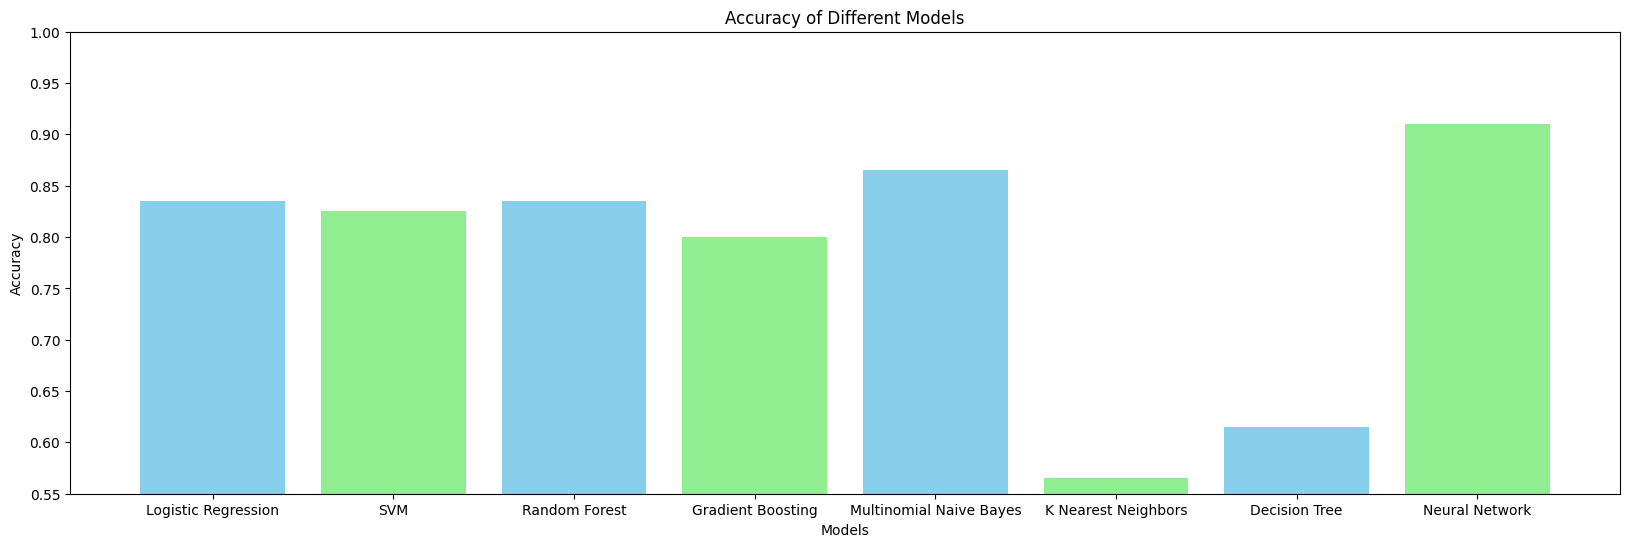

In [31]:
plt.figure(figsize=(20, 6))
models_accuracy = list(accuracy_results.keys())
accuracy = list(accuracy_results.values())

colors = ['skyblue', 'lightgreen']  # Good colors for the plots

plt.bar(models_accuracy, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.55, 1)  # Setting y-axis limits for better visualization
plt.show()

# Compare between TFidf and Bag of words

TF-IDF Train Accuracy: 0.976
TF-IDF Test Accuracy: 0.870
Bag of Words Train Accuracy: 0.921
Bag of Words Test Accuracy: 0.860


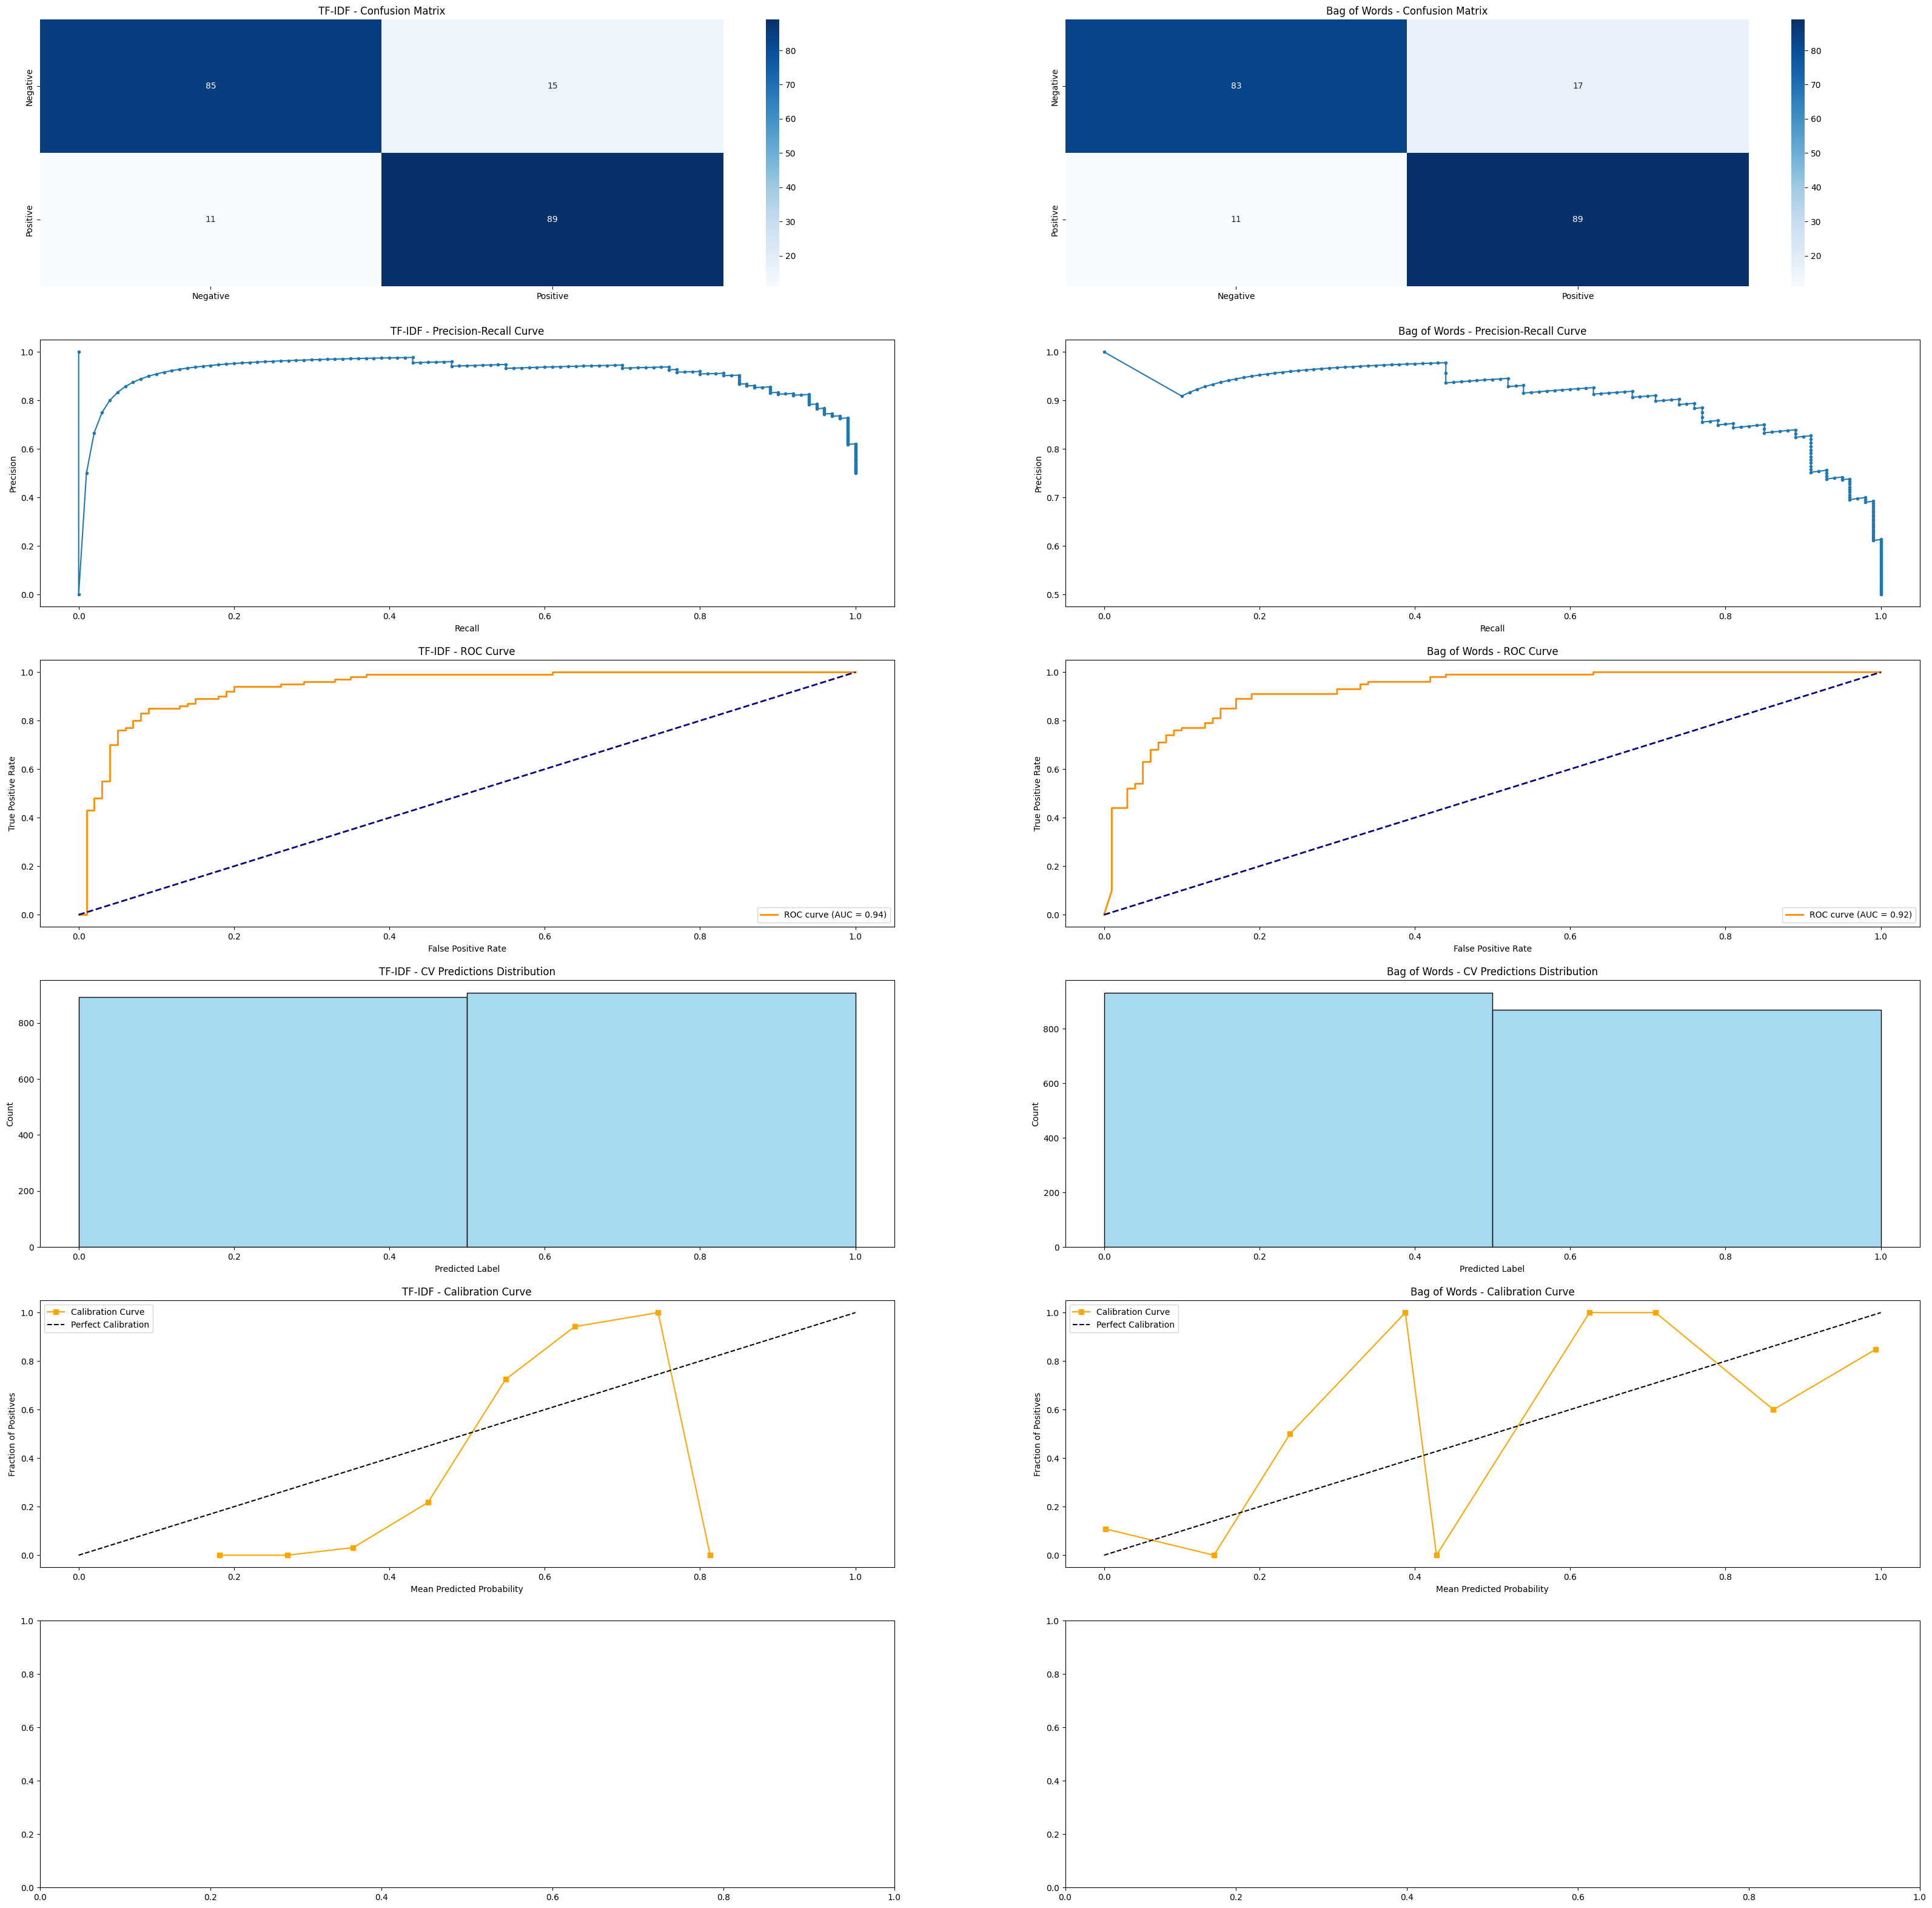

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.calibration import calibration_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize feature extraction methods
vectorizers = {
    "TF-IDF": TfidfVectorizer(),
    "Bag of Words": CountVectorizer()
}

accuracies = {}
# Initialize logistic regression model
model = models["Logistic Regression"]

# Initialize plots
fig, axs = plt.subplots(6, 2, figsize=(40, 40))

# Iterate over feature extraction methods
for i, (method, vectorizer) in enumerate(vectorizers.items()):
    # Fit vectorizer and transform data
    X_train_temp =  vectorizer.fit_transform(X_train)
    X_test_temp = vectorizer.transform(X_test)


    # Fit model
    model.fit(X_train_vec, y_train)
    train_predictions = model.predict(X_train_temp)
    test_predictions = model.predict(X_test_temp)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    accuracies[method] = (train_accuracy, test_accuracy)
    print(f"{method} Train Accuracy: {train_accuracy:.3f}")
    print(f"{method} Test Accuracy: {test_accuracy:.3f}")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, test_predictions)

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_temp)[:, 1])

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_temp)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Calculate cross-validation predictions
    y_pred_cv = cross_val_predict(model, X_train_temp, y_train, cv=5)

    # Calculate calibration curve
    prob_pos = model.predict_proba(X_test_temp)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)


    # Plot confusion matrix
    axs[0, i].set_title(f"{method} - Confusion Matrix")
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'], ax=axs[0, i])

    # Plot precision-recall curve
    axs[1, i].plot(recall, precision, marker='.', label='Precision-Recall Curve')
    axs[1, i].set_xlabel('Recall')
    axs[1, i].set_ylabel('Precision')
    axs[1, i].set_title(f"{method} - Precision-Recall Curve")

    # Plot ROC curve
    axs[2, i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axs[2, i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[2, i].set_xlabel('False Positive Rate')
    axs[2, i].set_ylabel('True Positive Rate')
    axs[2, i].set_title(f"{method} - ROC Curve")
    axs[2, i].legend(loc="lower right")

    # Plot cross-validation predictions distribution
    axs[3, i].set_title(f"{method} - CV Predictions Distribution")
    sns.histplot(y_pred_cv, bins=2, color='skyblue', ax=axs[3, i])
    axs[3, i].set_xlabel('Predicted Label')
    axs[3, i].set_ylabel('Count')

    # Plot calibration curve
    axs[4, i].plot(mean_predicted_value, fraction_of_positives, 's-', color='orange', label='Calibration Curve')
    axs[4, i].plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")
    axs[4, i].set_ylabel('Fraction of Positives')
    axs[4, i].set_xlabel('Mean Predicted Probability')
    axs[4, i].set_title(f"{method} - Calibration Curve")
    axs[4, i].legend()

    coefficients = model.coef_[0]
    indices = np.argsort(np.abs(coefficients))[::-1]

    # # Plot feature importances
    axs[5, i].set_title(f"{method} - Feature Importance")
    axs[5, i].bar(range(X_train_temp.shape[1]), np.abs(coefficients[indices]), align='center')
    axs[5, i].set_xticks(range(X_train_temp.shape[1]))
    axs[5, i].set_xticklabels(indices, rotation=90)
    axs[5, i].set_xlabel('Feature Index')
    axs[5, i].set_ylabel('Absolute Coefficient Value')


In [41]:
accuracies["Bag of Words"][0],accuracies["Bag of Words"][1],accuracies["TF-IDF"][0],accuracies["TF-IDF"][1]

(0.9211111111111111, 0.86, 0.9755555555555555, 0.87)

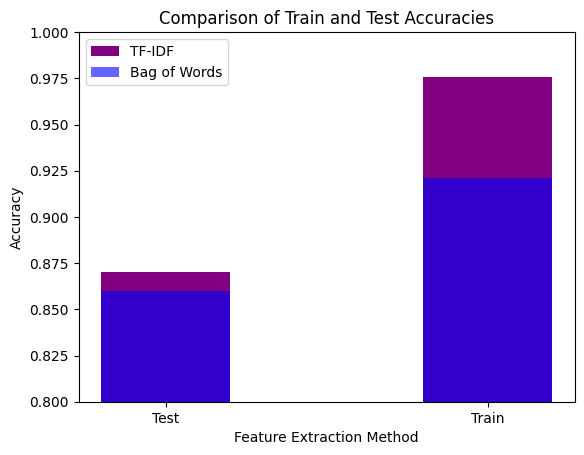

In [44]:
fig, ax = plt.subplots()

# Set up the data for plotting
methods = ['TF-IDF', 'Bag of Words']
train_tf = accuracies["TF-IDF"][0]
test_tf = accuracies["TF-IDF"][1]
train_bow = accuracies["Bag of Words"][0]
test_bow = accuracies["Bag of Words"][1]

# Position of bars on the x-axis
ind = range(len(methods))

# Plotting
ax.bar(ind, [test_tf,train_tf], width=0.4, label='TF-IDF', color='purple', alpha=1)
ax.bar(ind, [test_bow,train_bow], width=0.4, label='Bag of Words', color='blue', alpha=0.6)

# Labels, Title and Custom x-axis
ax.set_xlabel('Feature Extraction Method')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Train and Test Accuracies')
ax.set_xticks(ind)
ax.set_xticklabels(["Test","Train"])
ax.set_ylim(0.8, 1)  # Adjust the y-axis limits to "cut" the plot and focus on differences

# Adding a legend
ax.legend()

# Show the plot
plt.show()


In [45]:
df = pd.DataFrame({'data': np.concatenate((X_train,X_test)), 'label': np.concatenate((y_train,y_test))})

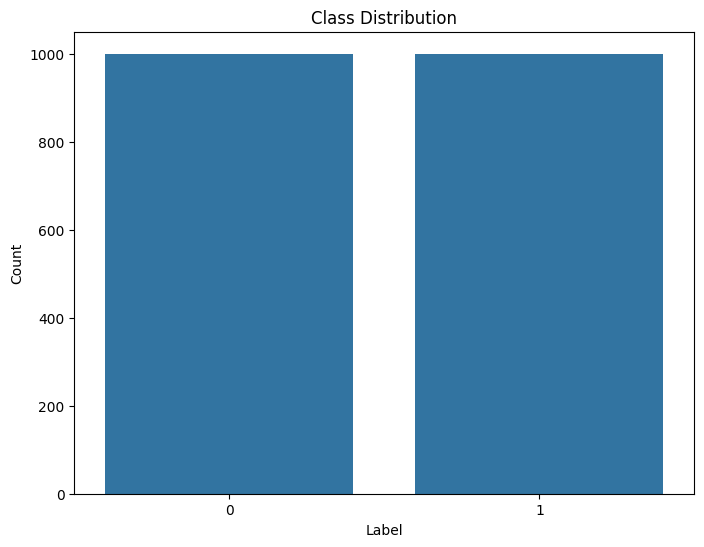

In [46]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np


# Class Distribution Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multil

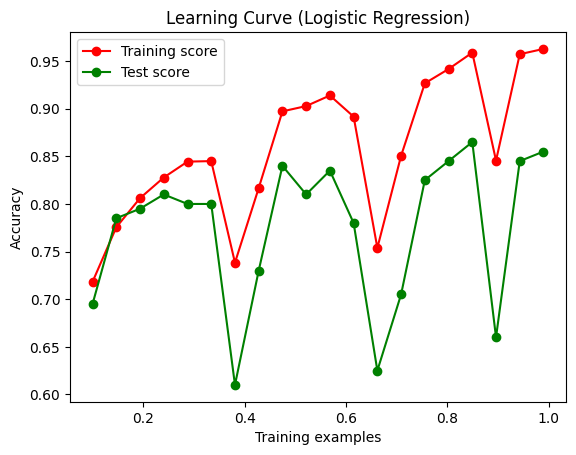

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Function to generate learning curve iteratively
def generate_learning_curve(model, X_train, X_test, y_train, y_test, train_sizes, random_state=42):
    train_scores = []
    test_scores = []

    for size in train_sizes:
        # Split data into training and test sets with the specified size
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=random_state)

        # Train the model on the training subset
        model.fit(X_train_subset, y_train_subset)

        # Predict on training and test sets
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        # Calculate accuracy scores
        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)

        # Append scores to lists
        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

    return train_scores, test_scores

logistic_regression = LogisticRegression()

train_sizes = np.linspace(0.1, 0.99, 20)  # Ensure train_size is in the range (0, 1)

# Generate learning curve for logistic regression
train_scores, test_scores = generate_learning_curve(logistic_regression, X_train_vec, X_test_vec, y_train, y_test, train_sizes)

# Plot learning curve
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores, 'o-', color="g", label="Test score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Logistic Regression)")
plt.legend(loc="best")
plt.show()


# Store Weights

In [63]:
!mkdir weights
%cd weights

/content/weights


In [65]:
import joblib

# Train each model and save its weights
for model_name, model_instance in models.items():
    joblib.dump(model_instance, f"{model_name}_weights.joblib")

%cd ..

/content


In [67]:
!tar -czvf weights.tar.gz /content/weights

tar: Removing leading `/' from member names
/content/weights/
/content/weights/Random Forest_weights.joblib
/content/weights/K Nearest Neighbors_weights.joblib
/content/weights/Logistic Regression_weights.joblib
/content/weights/Neural Network_weights.joblib
/content/weights/SVM_weights.joblib
/content/weights/Multinomial Naive Bayes_weights.joblib
/content/weights/Decision Tree_weights.joblib
/content/weights/Gradient Boosting_weights.joblib


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
! cp /content/weights1.tar.gz /content/drive/MyDrive/Hackathons

# Load Weights

In [80]:
import gdown


file_id = '1-0Ili-ftKaUXvmnvHqhWtYENm2skcQPk'

output = 'weights.tar.gz'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-0Ili-ftKaUXvmnvHqhWtYENm2skcQPk
From (redirected): https://drive.google.com/uc?id=1-0Ili-ftKaUXvmnvHqhWtYENm2skcQPk&confirm=t&uuid=4c240860-f5e9-4ba6-bc4c-5ffb644dffe2
To: /content/weights.tar.gz
100%|██████████| 95.8M/95.8M [00:00<00:00, 98.9MB/s]


'weights.tar.gz'

In [81]:
# !mkdir weights
!tar -xzvf /content/weights.tar.gz

content/weights/
content/weights/Random Forest_weights.joblib
content/weights/K Nearest Neighbors_weights.joblib
content/weights/Logistic Regression_weights.joblib
content/weights/Neural Network_weights.joblib
content/weights/SVM_weights.joblib
content/weights/Multinomial Naive Bayes_weights.joblib
content/weights/Decision Tree_weights.joblib
content/weights/Gradient Boosting_weights.joblib


In [86]:
import joblib

path = "/content/content/weights/"
# Dictionary to store loaded models
for model_name in models.keys():
    loaded_model = joblib.load(f"{path}{model_name}_weights.joblib")
    print(f"{path}{model_name}_weights.joblib")
    models[model_name] = loaded_model

/content/content/weights/Logistic Regression_weights.joblib
/content/content/weights/SVM_weights.joblib
/content/content/weights/Random Forest_weights.joblib
/content/content/weights/Gradient Boosting_weights.joblib
/content/content/weights/Multinomial Naive Bayes_weights.joblib
/content/content/weights/K Nearest Neighbors_weights.joblib
/content/content/weights/Decision Tree_weights.joblib
/content/content/weights/Neural Network_weights.joblib


In [83]:
accuracy_results = {}
highest_accuracy = 0
# Train and test models
for name, model in models.items():
    train_predictions = model.predict(X_train_vec)
    train_accuracy = accuracy_score(y_train, train_predictions)

    test_predictions = model.predict(X_test_vec)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Save accuracy results
    accuracy_results[name] = test_accuracy
    if highest_accuracy < test_accuracy:
      highest_accuracy = test_accuracy
    print(f"Train Accuracy for {name}: {train_accuracy}")
    print(f"Test Accuracy for {name}: {test_accuracy}")


print("=============================")
print("Highest accuracy =", highest_accuracy)

Train Accuracy for Logistic Regression: 0.9755555555555555
Test Accuracy for Logistic Regression: 0.87
Train Accuracy for SVM: 0.5
Test Accuracy for SVM: 0.5
Train Accuracy for Random Forest: 0.5
Test Accuracy for Random Forest: 0.5
Train Accuracy for Gradient Boosting: 0.5
Test Accuracy for Gradient Boosting: 0.5
Train Accuracy for Multinomial Naive Bayes: 0.9827777777777778
Test Accuracy for Multinomial Naive Bayes: 0.83
Train Accuracy for K Nearest Neighbors: 0.5
Test Accuracy for K Nearest Neighbors: 0.5
Train Accuracy for Decision Tree: 0.5005555555555555
Test Accuracy for Decision Tree: 0.5
Train Accuracy for Neural Network: 1.0
Test Accuracy for Neural Network: 0.76
Highest accuracy = 0.87


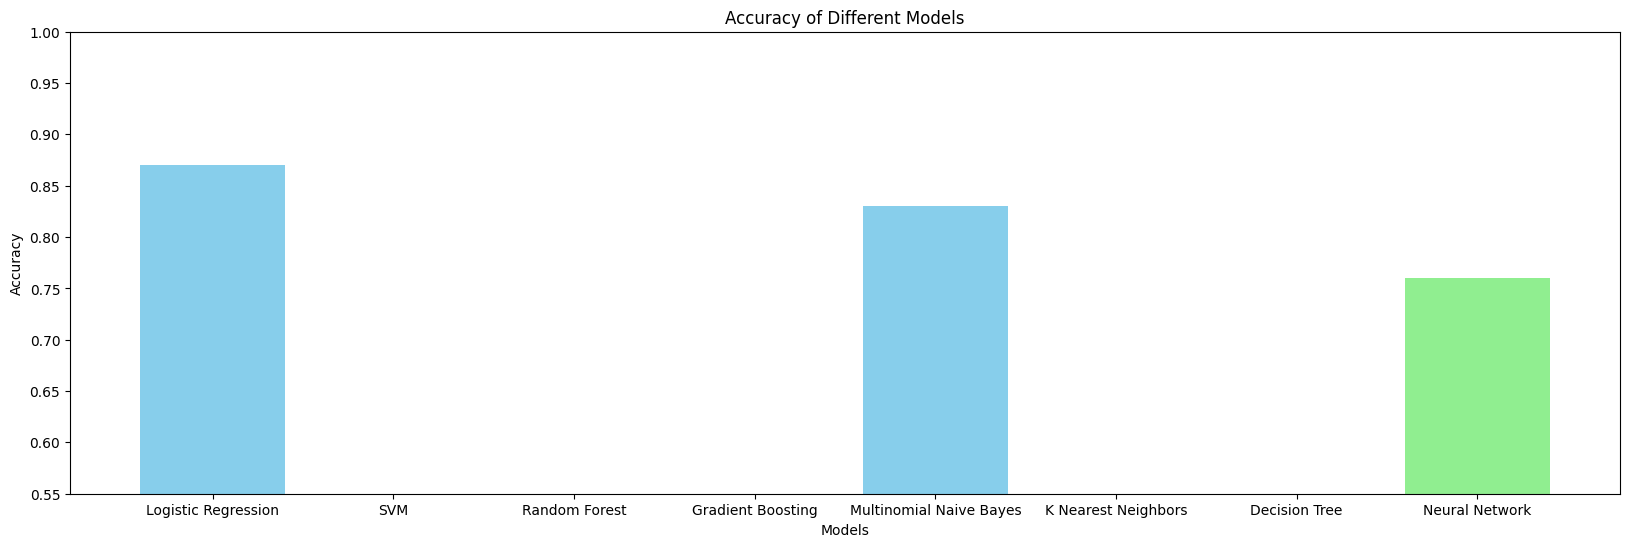

In [84]:
plt.figure(figsize=(20, 6))
models_accuracy = list(accuracy_results.keys())
accuracy = list(accuracy_results.values())

colors = ['skyblue', 'lightgreen']  # Good colors for the plots

plt.bar(models_accuracy, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.55, 1)  # Setting y-axis limits for better visualization
plt.show()